### House Price Prediction IML Assignment
### Ajith P - E22005
### Gopal Gupta - E22015
### Himkant Nigam - E22017

## Experiment 1 : An experiment to import training dataset and perform Exploratory Data Analysis to find answers to unbiased null hypothesis and find features containing anomalies & outliers along with finding useful insights by questioning the data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r"C:\Users\Lenovo\Documents\PRAXIS\IML-GN")

In [3]:
import graph_file as gf      # importing the graph function

In [4]:
data1=pd.read_csv(r"C:\Users\Lenovo\Downloads\kc_house_train_data.csv")    # loading HPP training dataset

In [5]:
data=data1.copy()                          #creating a sepreate copy of dataframe

In [6]:
data['date']=pd.to_datetime(data['date']) # changing the date datatype from object to datetime dtype

In [7]:
data=data.drop(columns=['sqft_living15','sqft_lot15']) # removing last two columns

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045


**Q. What does each column from the given dataset represents? explain each column.**
   

**Q. What decimal values represents in floors and bathrooms column?**


**Q. What is the format of date? is it interpretable?**

    id             => It is a unique ID of the property purchased by a person 
    date           => It the date of sell of the property/house in YYYY/MM/DD format(after changing the data type)
    price          => Price of the house in dollars
    bedrooms       => No. of total bedrooms in the house
    bathroom       => No. of bathroom in the house.1 represents complete bathroom,0.5 represents just the toilet and 0.25                         represents wash basin
    sqft_living    => Size of living area in the house in sq.feet
    sqft_lot       => Size of the property/house 
    floors         => Total no. of the floors in the house. 0.5 represents partial occupancy of the floor.
    waterfront     => presence of water body in front of property. 1 represents presence of waterbody whereas 0 represents                       no waterbody
    view           => represents the property view rating on the scale of 0-4
    condition      => represents condition of the property on the scale of 1-5
    grade          => class or quality of the property based on ratings. scale is unknown
    sqft_above     => size of the area above the ground in sq. feet
    sqft_basement  => size of the property below the ground in sq.feet
    yr_built       => year built
    yr_renovated   => year of renovation. 0 represent no renovation
    zipcode        => area zipcode. 5 digit number
    lat            => Latitude
    long           => longitude


# Hypothesis without EDA

    1) All values in ID column are unique
    2) Every house in the given data have atleast 1 bathroom
    3) size of sqft_lot for every house is always greater than size of its sqft_living
    4) Higher grade of house will increases the price
    5) price of house will be high if the house have waterfront
    6) sqft_lot is directly proportional to price
    7) higher the view, higher will be the price 
    

# Exploratory data analysis

**1)All values in ID column are unique**

In [9]:
len(data[data['id'].duplicated()])  # there are 41 duplicate records in ID attribute

41

**2) Every house in the given data have atleast 1 bathroom**

In [10]:
len(data[data['bathrooms']==0]) # there are 4 houses without bathroom

4

**3) size of sqft_lot for every house is always greater than size of its sqft_living**

In [11]:
len(data[data['sqft_living']>=data['sqft_lot']].index) 
# there are 308 houses that are having size of property less than size of living area,this may an anomally
# may be the size of living area is considers as sum of size of all the floors of that house.
# will verify this in further analysis
                                                       

308

**4) High grades of house will increase the price**

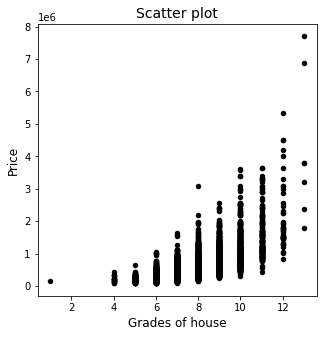

In [12]:
data.plot(kind='scatter',                 #the type of the plot to  be plotted
         x='grade',y='price',              # the variables in x and y axis
         color='black',                   # color of the dots
         figsize=(5,5))                    # figure size
plt.xlabel('Grades of house',fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter plot',Fontsize=14)

plt.show()

# our hypothesis is correct in this cases
#as the grade is increasing, the price range of the houses is also increasing

**5) price of house will be high if the house have waterfront**

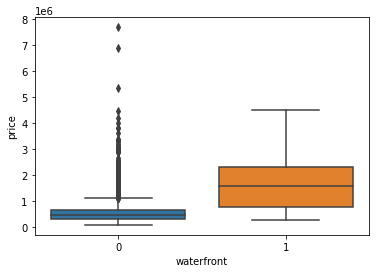

In [13]:
#creating box plot
sns.boxplot(data = data , y = 'price' , x = "waterfront");

#as we can see in box plot,most of the houses are having higher prices that have waterfront as compared to 
#house doesn't have waterfront.but still there are houses that are having highest price doesn't have waterfront.


**6) sqft_lot is directly proportional to price**

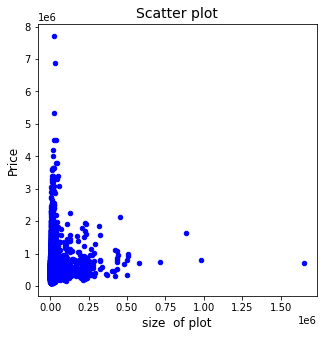

In [14]:
data.plot(kind='scatter',                 #the type of the plot to  be plotted
         x='sqft_lot',y='price',              # the variables in x and y axis
         color='blue',                   # color of the dots
         figsize=(5,5))                    # figure size
plt.xlabel('size  of plot',fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter plot',Fontsize=14)

plt.show()

# In this  case, our hypothesis is incorrect
# as we can see ,prices are high even though the size of plot is less.
# this may happen because of more floors a house may have.

**7) higher the view, higher will be the price**

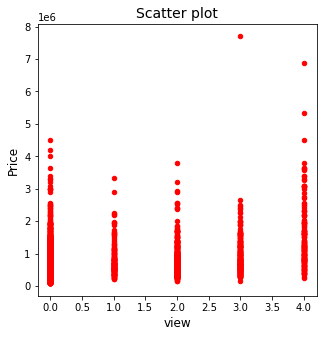

In [15]:
data.plot(kind='scatter',                 #the type of the plot to  be plotted
         x='view',y='price',              # the variables in x and y axis
         color='red',                   # color of the dots
         figsize=(5,5))                    # figure size
plt.xlabel('view',fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter plot',Fontsize=14)

plt.show()

#here, our hypothesis is incorrect 
# as we can see, view doesn't affect much the price range of the house

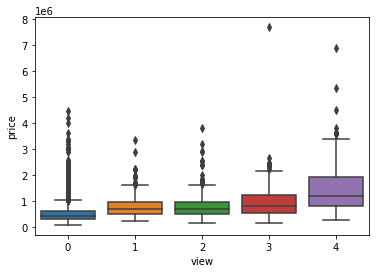

In [16]:
sns.boxplot(data = data , y = 'price' , x = "view");

# univariate analysis

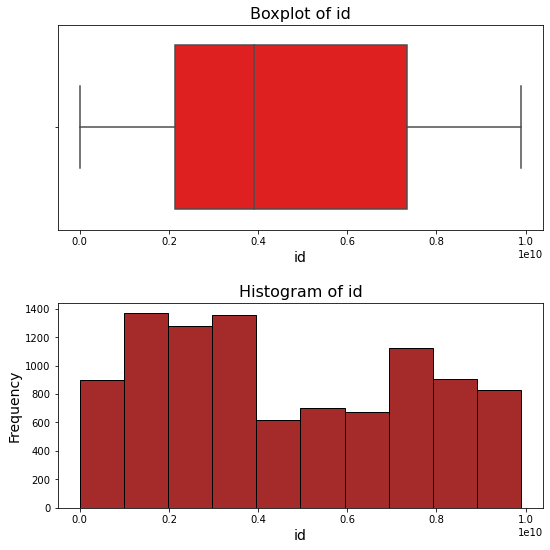

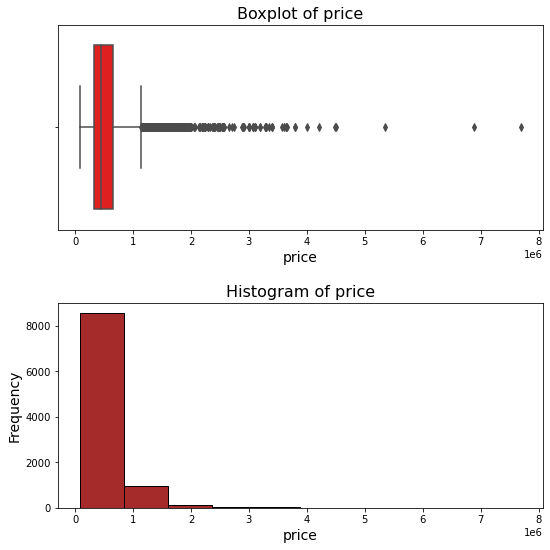

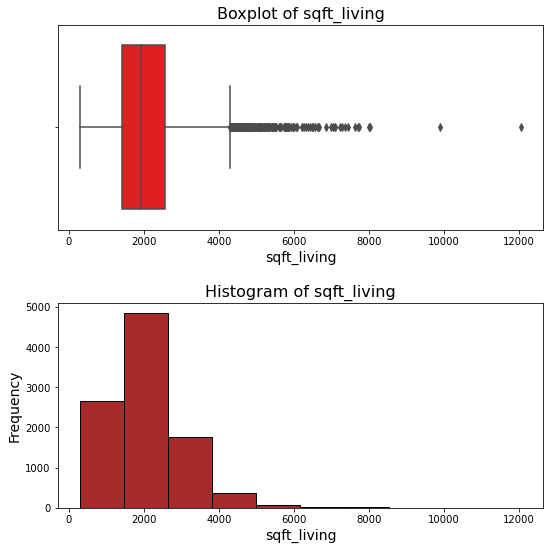

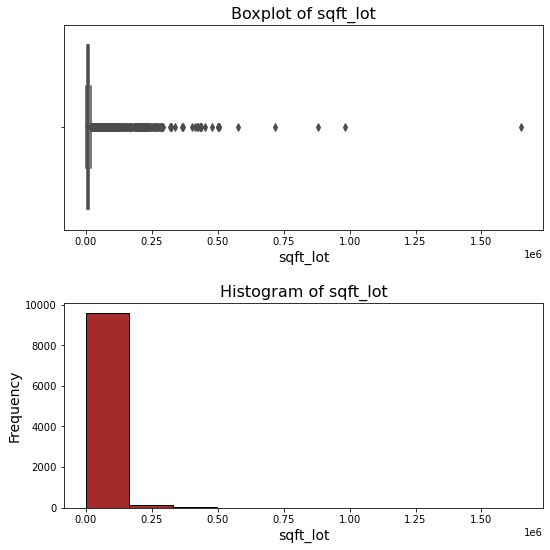

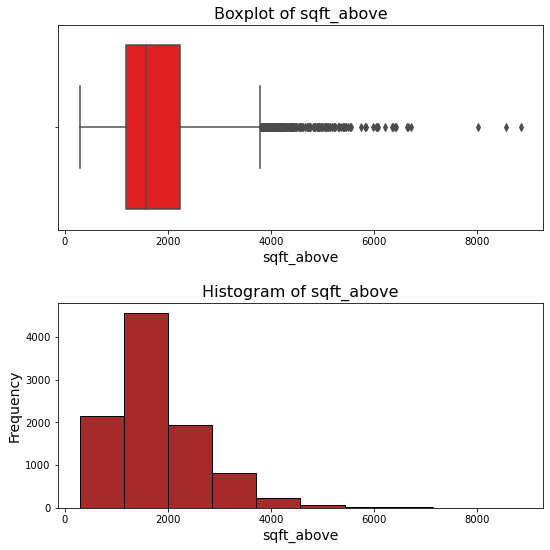

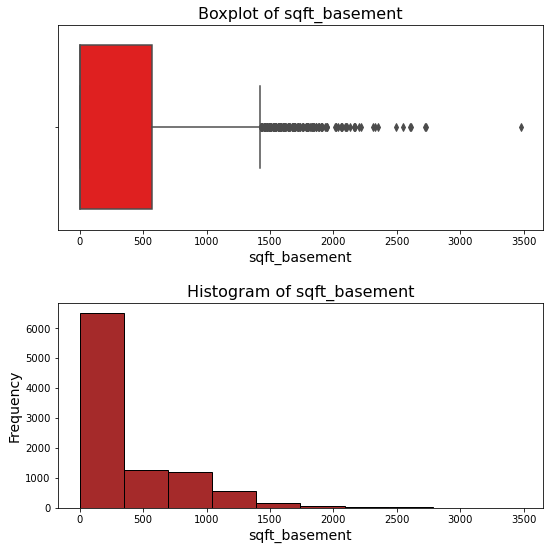

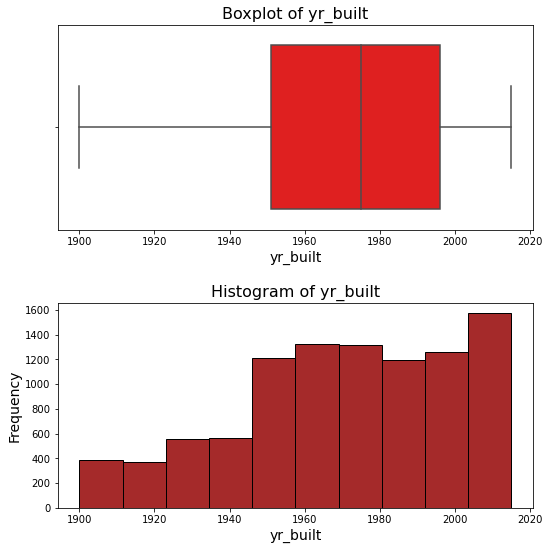

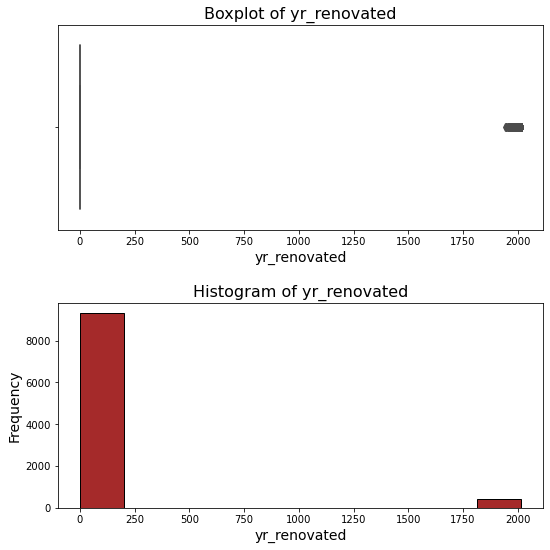

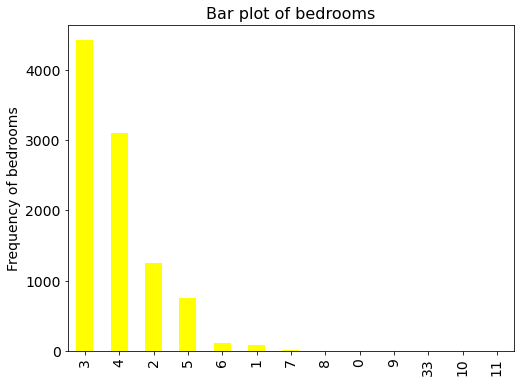

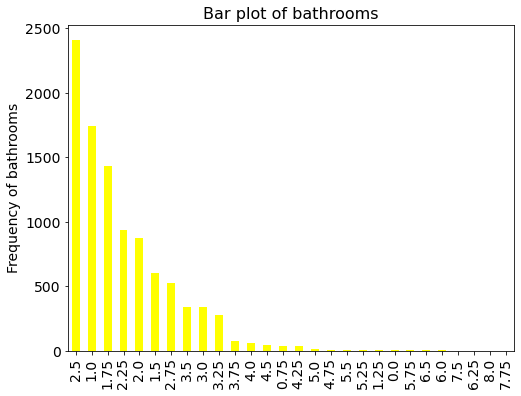

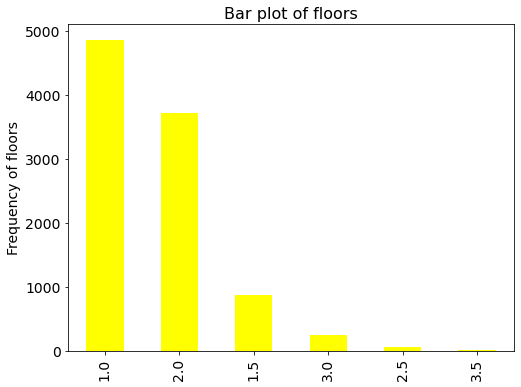

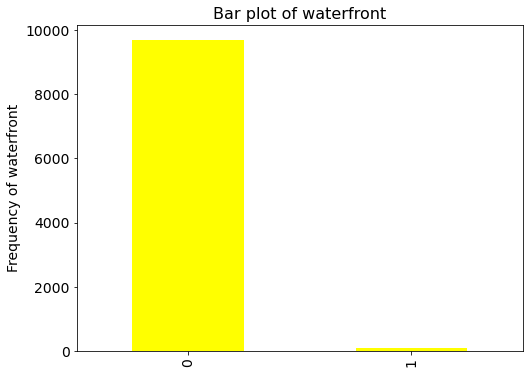

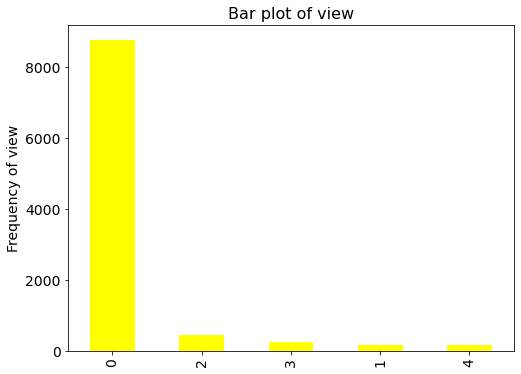

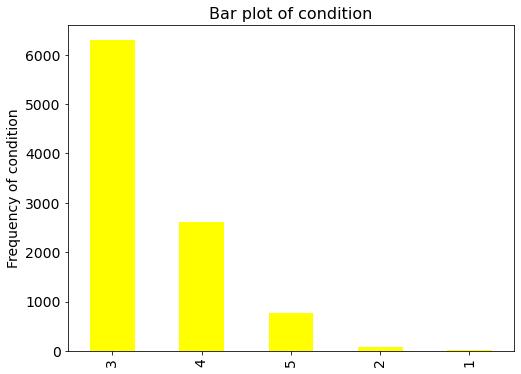

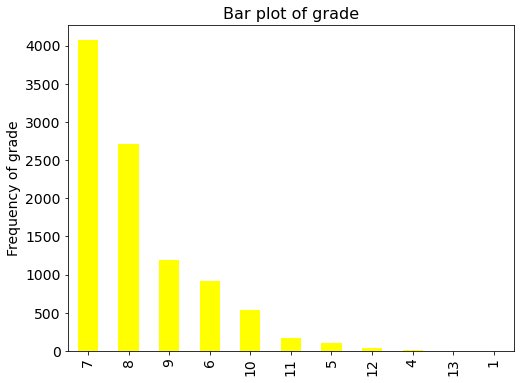

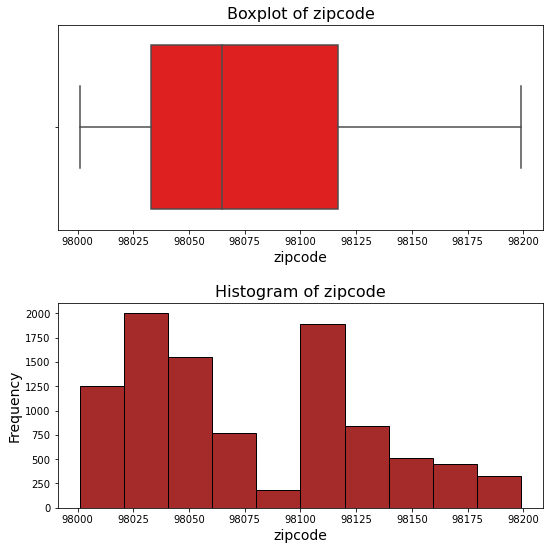

In [17]:
#importing the  graph function from the graph file.

gf.graph_v5(data,columns=['id','price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode'],criteria=30)

### From univariate analysis we can find that:

    - about 3/4th houses have either 3 or 4 bedrooms with 3 in majority.
    - less than 1% houses have any waterfront.
    - about 90% houses have not been viewed, so either they are newly built or are very old or they are located in a place          in outskirts where there is very less population.
    - only 1% of the houses seem to be in a bad condition while 8% houses seem to be in their best condition, rest others            are average or more than average.
    - data misses grade 2 and grade 3 but total count is correct.
    - lowest 4 grades consist of about 10% houses and highest 4 grades consist of about almost 8% houses, rest 3 grades 7,8         and 9 contain 82% houses in the given data.
    - around 20% houses have price within first 3,00,000 dollars,almost 50% houses have price between 3,00,000 and 6,00,000         dolars while other 30% houses have price over 600000 with highest price as 77,00,000 dollars and minimum price as           80,000 dollars.
    - houses having price above 45,00,000 have more bathrooms than bedrooms.
    - Almost 4% houses have more bathrooms than bedrooms.
    - Around 80% houses have number of bathrooms between 1 and 2.5

# Bivariate analysis

**Descriptive analysis**

In [18]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000


In [19]:
data['bedrooms'].unique() # here the max no. of bedrooms in a house is 33.lets check how many such houses are there

array([ 4,  2,  3,  5,  6,  1,  7,  8,  9,  0, 11, 10, 33], dtype=int64)

In [20]:
data[data['bedrooms']==33] # there is only one record which is having bedroom =33.will verify it by check other attributes
                           # weather this record is anomally or not. if it is an anomally will replace it by using
                           # appropriate centre of measures 
                        

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
7204,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331


In [21]:
data['bedrooms'] = data['bedrooms'].replace(33,3)  # replacing the anomally with mode values of bedrooms attribute
                                                   #since the living area and total area does not seems compatible enough,
                                                   #its an entry error, hence we will be replacing with mode value of the data

In [22]:
pd.crosstab(data['waterfront'],columns='Counts')  # out of 9761 observations, only 82 observations has waterfront

col_0,Counts
waterfront,
0,9679
1,82


In [23]:
pd.crosstab(data['yr_renovated'],columns='Counts') # from total observation, 9340 houses never got renovated

col_0,Counts
yr_renovated,
0,9340
1940,1
1945,2
1946,2
1950,1
...,...
2011,7
2012,4
2013,13


In [24]:
pd.crosstab(data['sqft_living']==data['sqft_above']+data['sqft_basement'],columns='Counts') # sqft_living includes basement area as well

col_0,Counts
row_0,
True,9761


In [25]:
# size of living area should be greater than size of entire plot size
# as we know that,sqft_living=sqft_above+ sqft_basement
# if we multiple 'floors' with 'sqft_lot' that will give us max area size on which person can built living area(including basement)

data[data['sqft_living']>(data['sqft_lot']*data['floors'])]

# out of all observation,4 records are having sqft_living higher than sqft of plot*floors
# out of 4 records 1 records having a large difference (index=7134) whose sqft_living is 2420 and sqft_lot*floor is 520*1.5 which is less
# therefore, record 7134 could be a anomally.we can either remove the record or ratify if by replacing the value

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2633,2770604103,2014-07-31,450000.0,3,2.50,1530,762,2.0,0,0,3,8,1050,480,2007,0,98119,47.6420,-122.374
6020,2877104196,2014-12-06,760000.0,3,2.00,1780,1750,1.0,0,2,3,8,1400,380,1927,2014,98103,47.6797,-122.357
6029,3277800845,2014-07-11,370000.0,3,1.00,1170,1105,1.0,0,0,3,7,1170,0,1965,0,98126,47.5448,-122.375
7134,9828702895,2014-10-22,700000.0,4,1.75,2420,520,1.5,0,0,3,7,2420,0,1900,0,98112,47.6209,-122.302


In [26]:
# the best way to find relation between target and the predictor is to find correlation between target and each variables

The values in darker shade of red specify high correlation and in lighter shades specify lower correlation


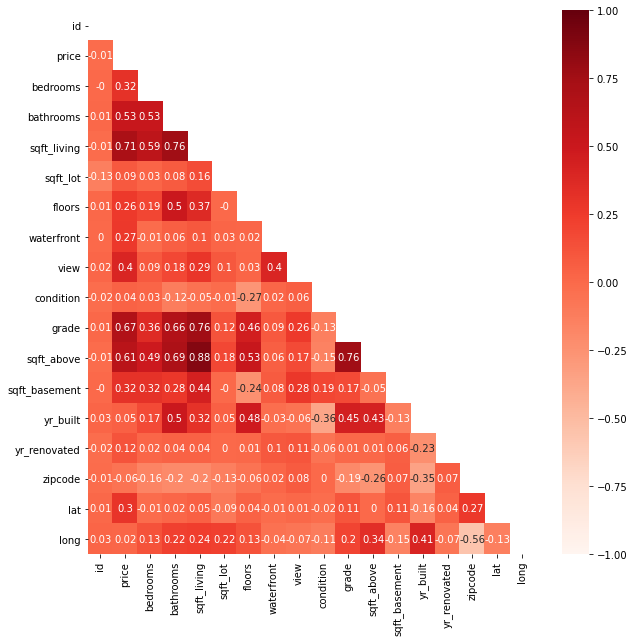

In [27]:
gf.graph_v6(data)

In [28]:
# From the above correlation chart,we can see that

#sqft_living is having high correlation with sqft_above,grade, bathrooms and price
#also, bathroom is having high correlation with sqft_living,sqft_above and grade
#since our target attribute is price, lets analysis target with other predictors especially 
#sqft_living,grade,sqft_above and bathroom(high correlation)

In [29]:
df_disc = data.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade','zipcode']]      #discrete columns
df_cont = data.loc[:,['id','price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long']]

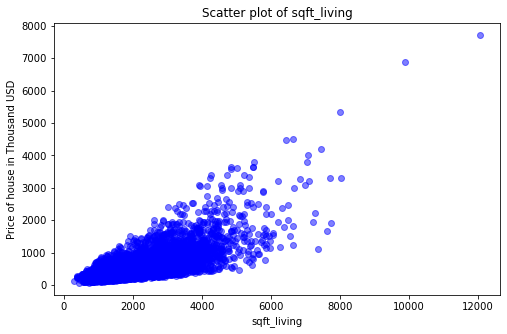

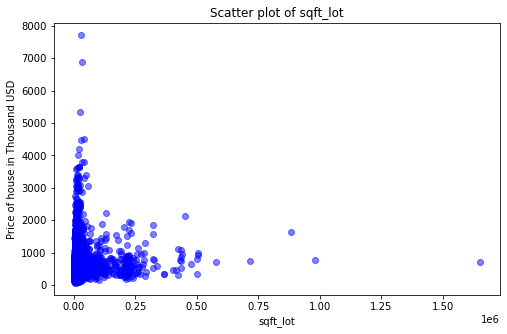

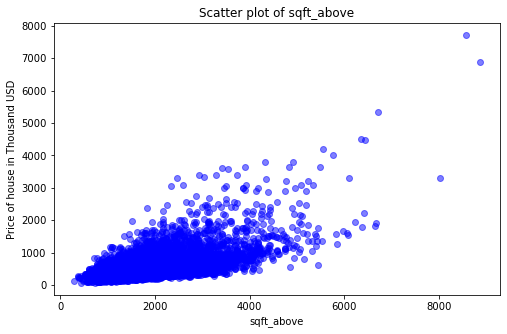

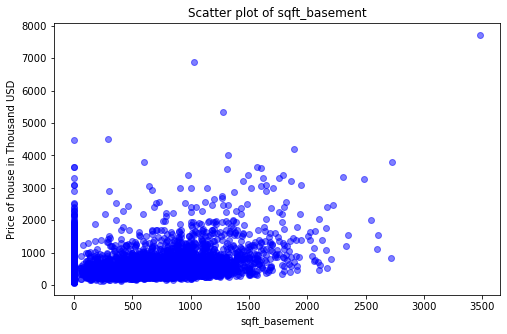

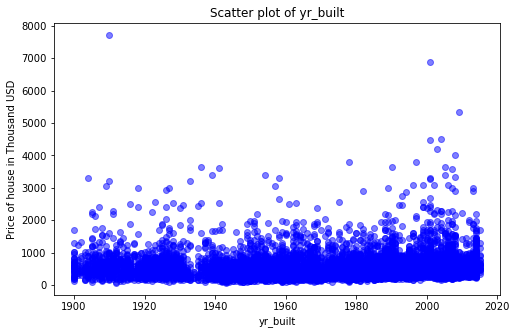

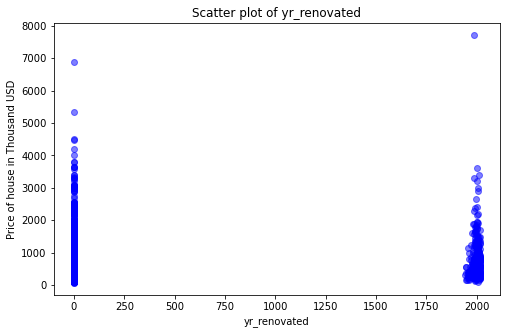

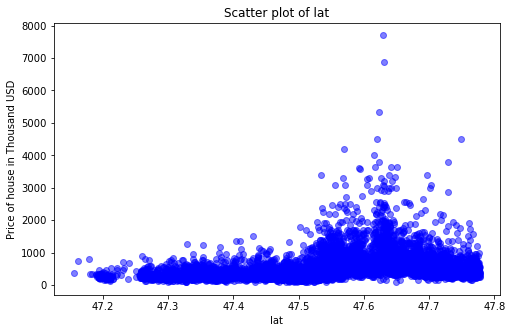

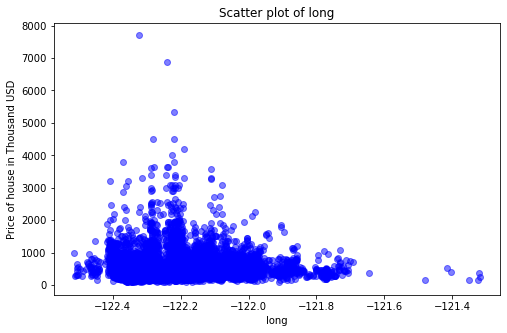

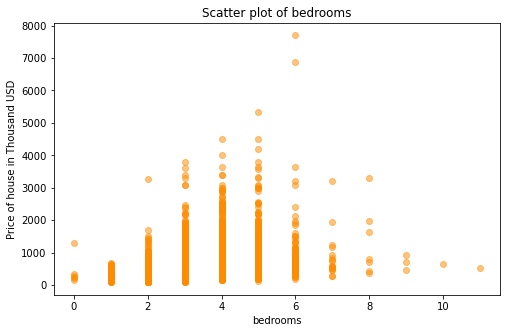

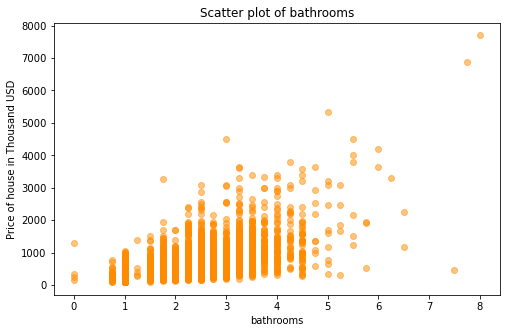

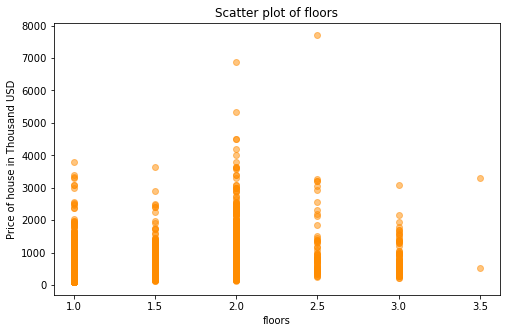

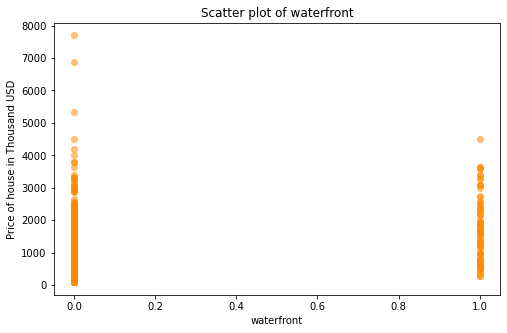

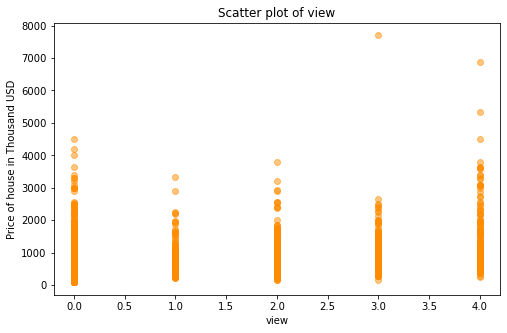

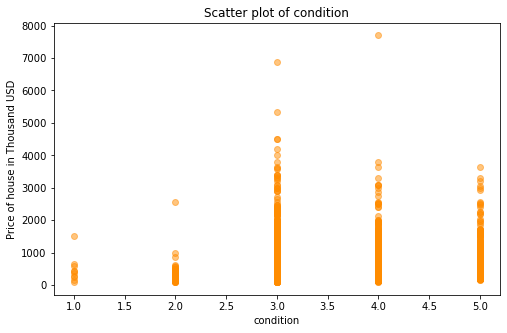

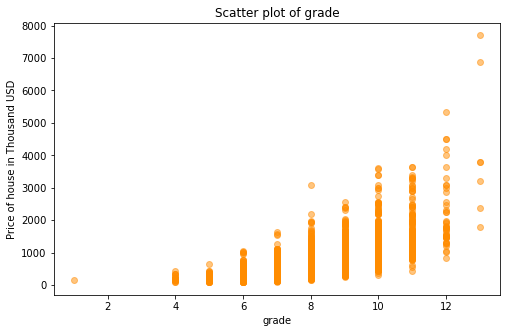

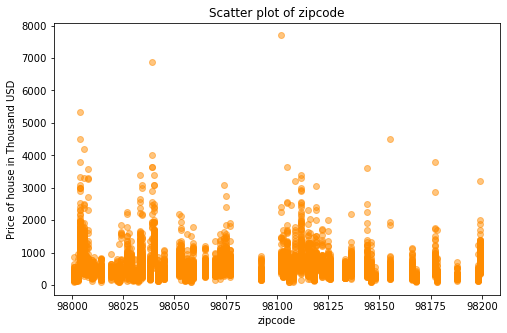

In [30]:
for i in range(2,len(df_cont.columns)):
    plt.figure(figsize=(8,5))
    plt.scatter(df_cont.iloc[:,i],(df_cont.price/1000),color='Blue',alpha=0.5)
    plt.xlabel(df_cont.columns[i])                      #assigning X-axis label
    plt.ylabel('Price of house in Thousand USD')        #assigning Y-axis label
    plt.title('Scatter plot of %s'%df_cont.columns[i])  #assigning Scatter plot title
    plt.show()
for i in range(len(df_disc.columns)):
    plt.figure(figsize=(8,5))
    plt.scatter(df_disc.iloc[:,i],(df_cont.price/1000),color='DarkOrange',alpha=0.5)
    plt.xlabel(df_disc.columns[i])                      #assigning X-axis label
    plt.ylabel('Price of house in Thousand USD')       #assigning Y-axis label
    plt.title('Scatter plot of %s'%df_disc.columns[i])  #assigning Scatter plot title
    plt.show()

## Conclusion : Hence we were able to find answers to our null hypothesis and find some anomaies and insights from the given dataset. Since we have studied the given dataset, our next step will be Model fitting.

## Experiment 2 : An experiment to train decesion Tree regression model on the given dataset for different attributes so as to build a model to predict price of the houses in the future having same attributes.

# Model 1

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score 

In [32]:
X1=data[["bedrooms","bathrooms","sqft_living","view","grade","lat"]]# taking columns(predictors) which are having high correlation with 
y=data.price                                                       #price(target) and having less correlation amongst each other

In [33]:
X_stand=X1.apply(lambda x:(x-np.mean(x))/np.std(x))                # standardizing data

In [34]:
X_train,X_val,y_train,y_val=train_test_split(X_stand,y,test_size=0.2,random_state=0) # spliting train and validation data

In [35]:
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)  # fitting decision tree regressor model
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

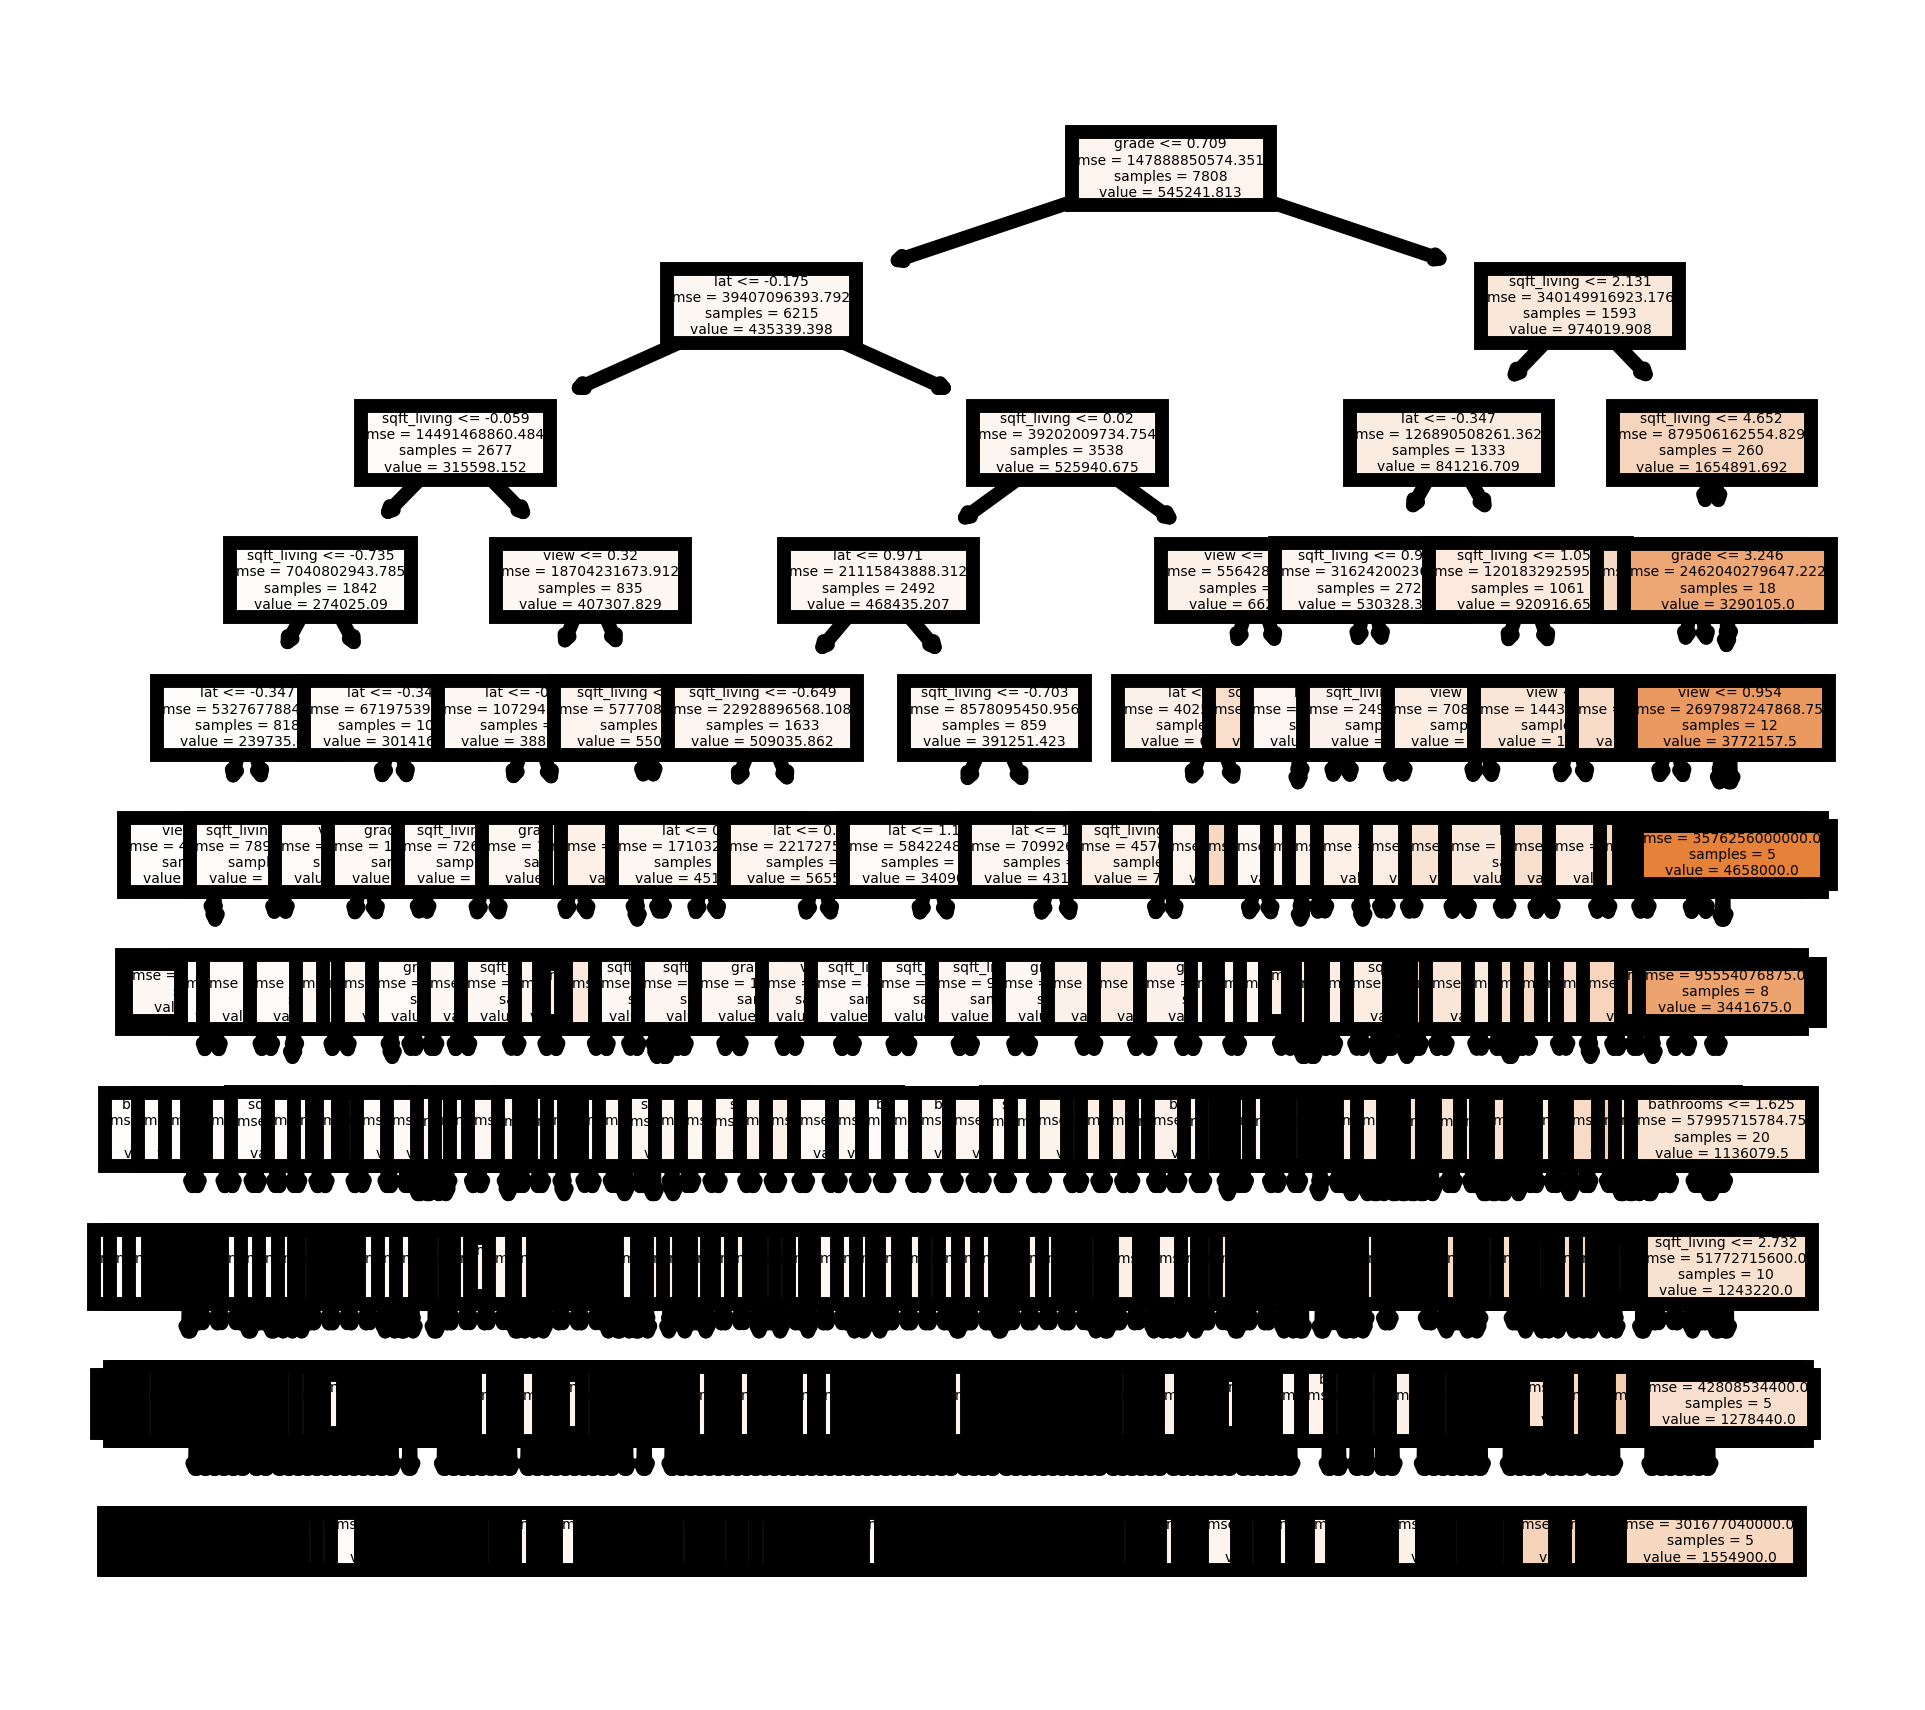

In [36]:
fig,axes=plt.subplots(figsize=(2,2),dpi=1000)                   # plotting decision tree
tree.plot_tree(reg_tree,feature_names=list(X1),filled=True,impurity=True)
plt.show()

In [37]:
y_pred=reg_tree.predict(X_val)         #After model training, predicting y on x_valid

In [38]:
#RMSE value
np.sqrt(np.mean((y_val-y_pred)**2))    # calculating RMSE value

178655.57613222592

In [39]:
#MAE value
np.mean(np.abs(y_val-y_pred))

102616.83517224659

In [40]:
#MAPE(Mean Absolute Percentage Error)
np.mean(np.abs((np.array(y_val) - y_pred)/(np.array(y_val))*100))

18.979122360922513

In [41]:
from sklearn.metrics import r2_score   # calculating R^2 values
score=r2_score(y_pred,y_val)           # in general,higher the R-squared, the better the model fits your data.
score

0.7315021431443067

# Model 2

In [42]:
# Adding more predictors to analysis RMSE and R square value in DT model

In [43]:
X2=data[['sqft_living','lat','bedrooms','bathrooms','waterfront','view','grade','zipcode']]
y2=data.price                                                          # adding more predictors for better RMSE and R square

In [44]:
X_stand1=X2.apply(lambda x:(x-np.mean(x))/np.std(x))                   # standarizing data

In [45]:
X_train,X_val,y_train,y_val=train_test_split(X_stand1,y2,test_size=0.2,random_state=0) # spliting into train validation data

In [46]:
reg_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
reg_tree.fit(X_train, y_train)                                         # fitting the model 

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

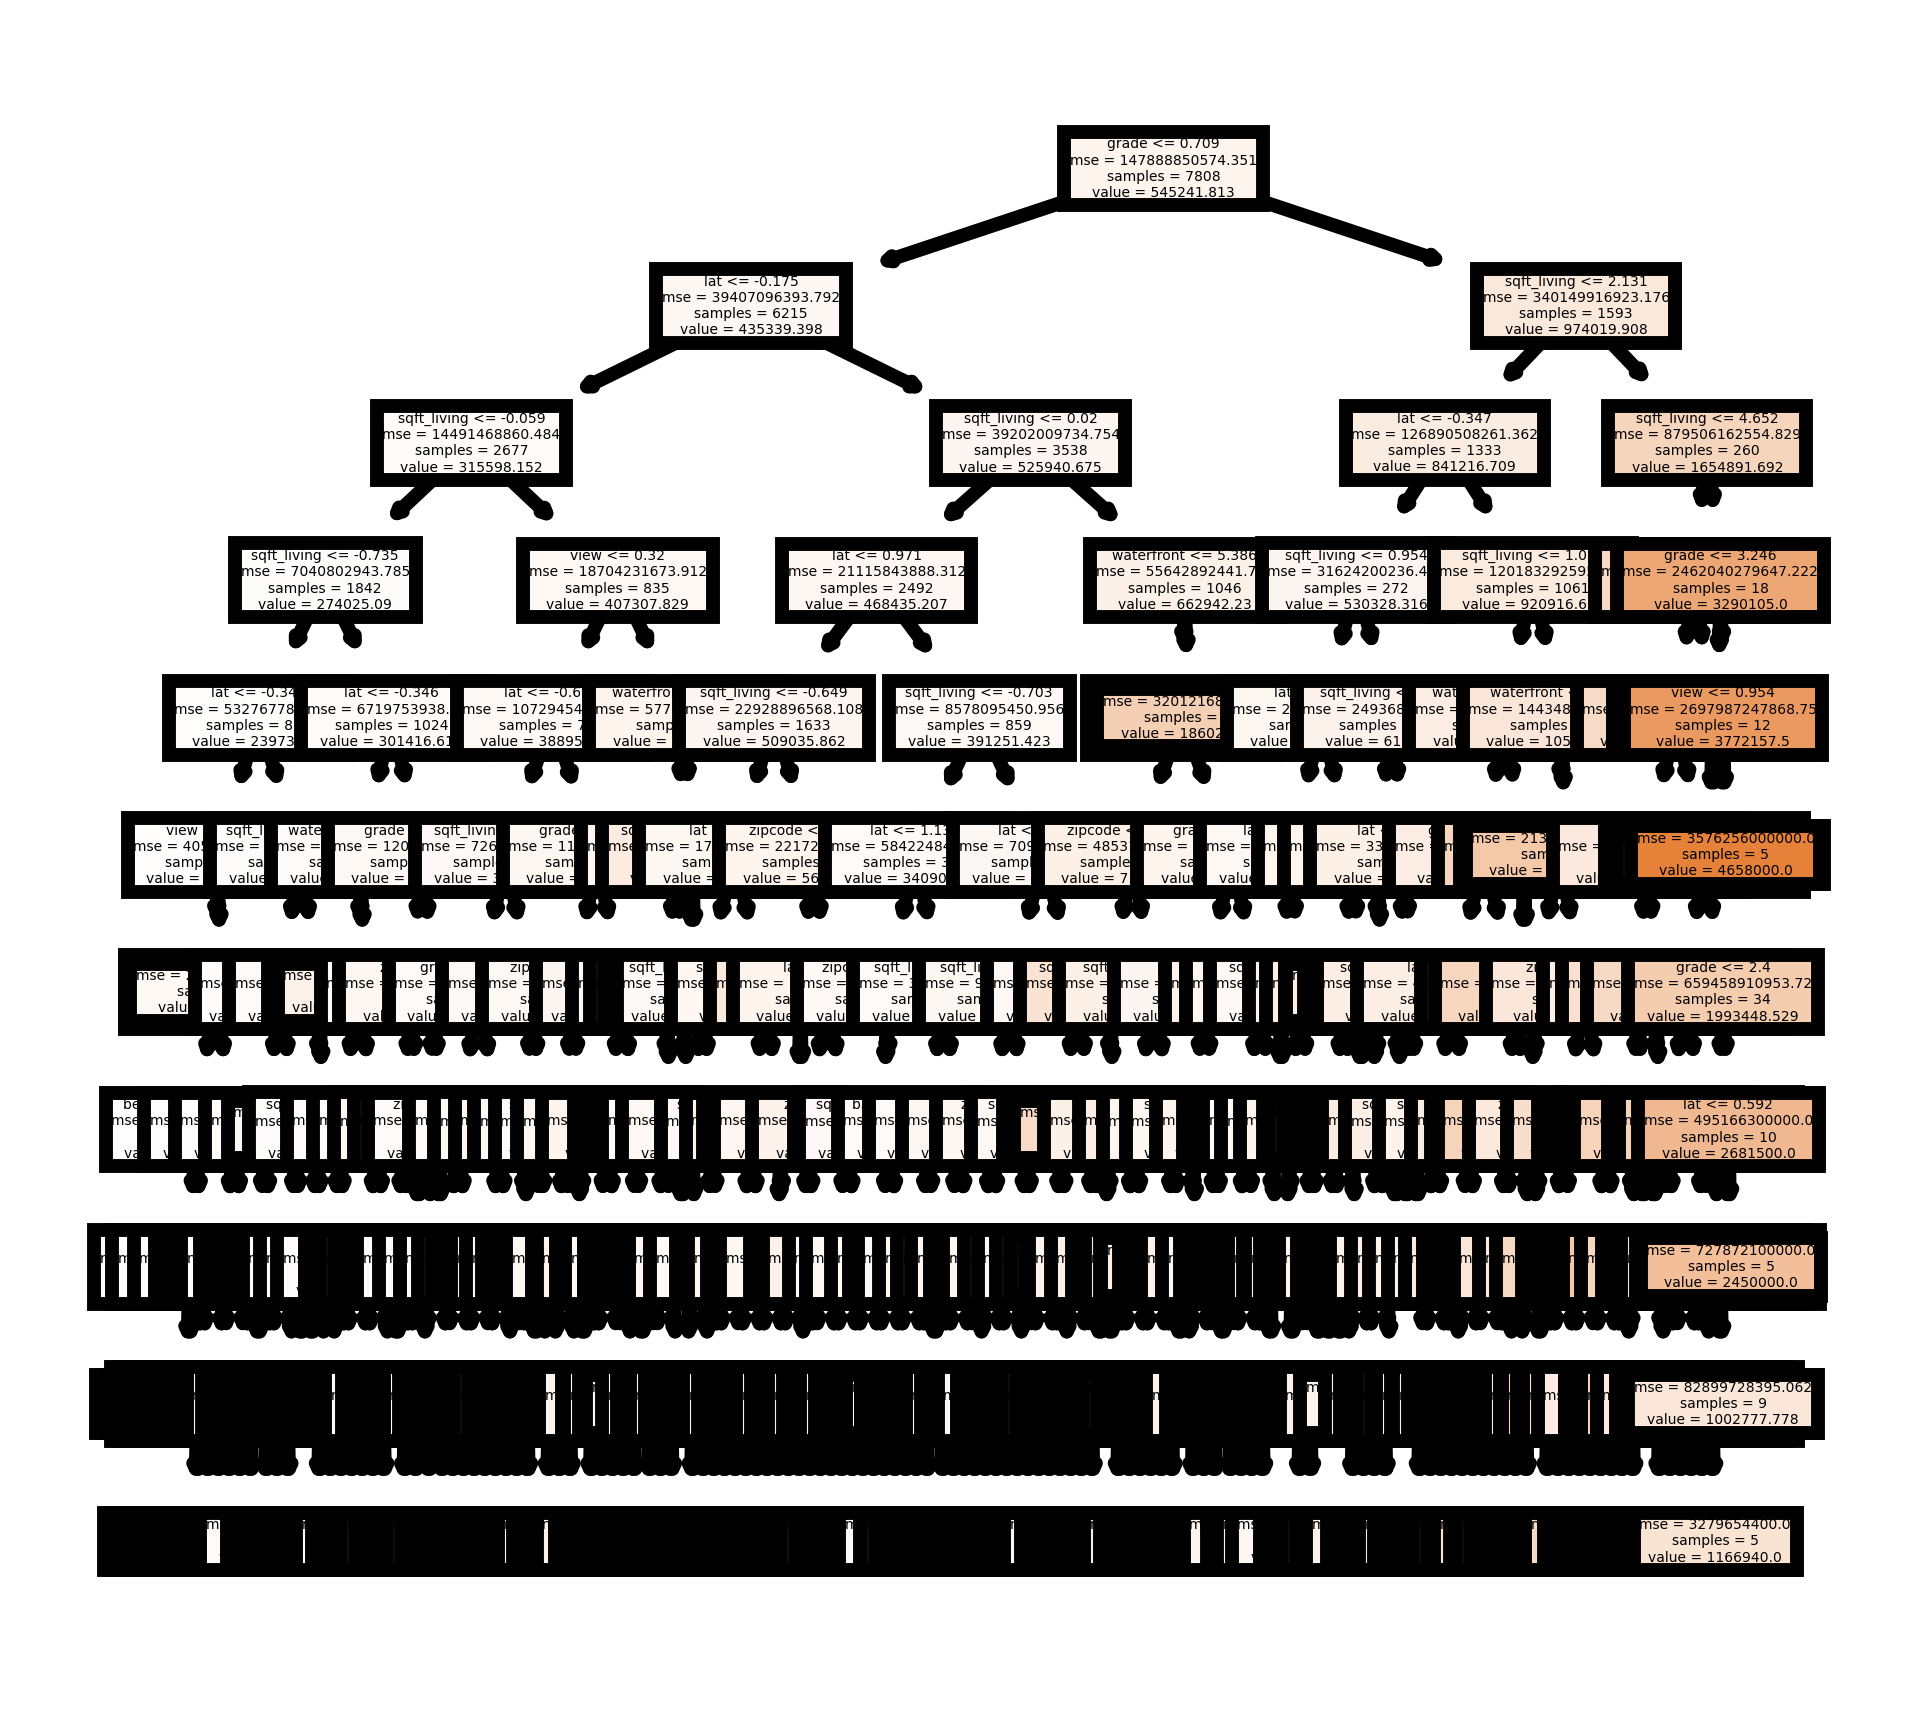

In [47]:
fig,axes=plt.subplots(figsize=(2,2),dpi=1000)                           # plotting decision tree 
tree.plot_tree(reg_tree,feature_names=list(X2),filled=True,impurity=True)
plt.show()

In [48]:
y_pred=reg_tree.predict(X_val) #predicting y on x_valid

In [49]:
#RMSE value                         # calculate RMSE 
np.sqrt(np.mean((y_val-y_pred)**2)) # RMSE is less than the previous model

159264.20606049223

In [50]:
#MSE value
np.mean(np.abs(y_val-y_pred))

93339.9680337761

In [51]:
#MAPE(Mean Absolute Percentage Error)
np.mean(np.abs((np.array(y_val) - y_pred)/(np.array(y_val))*100))

17.640234666456987

In [52]:
from sklearn.metrics import r2_score # calculating the R square 
score=r2_score(y_pred,y_val)        # here, R square value is higher than the previous model
score

0.7984821855916329

In [53]:
#10-fold cross validation
from sklearn.model_selection import cross_val_score    
depth=np.arange(5,25)
#empty list that will hold cv scores
cv_scores1=[]  # for RMSE
cv_scores2=[]   # for r square
cv_scores3=[]    # for mae 

#perform 10_fold cross validation
for i in depth:
    reg_tree=DecisionTreeRegressor(max_depth=i,min_samples_leaf=5)
    scores1=cross_val_score(reg_tree,X_stand,y,cv=10,scoring='neg_root_mean_squared_error') # calcuating RMSE on X_stand
    scores2=cross_val_score(reg_tree,X_stand,y,cv=10,scoring='r2')                          # calculating R^2 on X_stand
    scores3=cross_val_score(reg_tree,X_stand,y,cv=10,scoring='neg_mean_absolute_error')     # calculating mae on X_stand
    cv_scores1.append(scores1.mean()) 
    cv_scores2.append(scores2.mean())
    cv_scores3.append(scores3.mean())
    

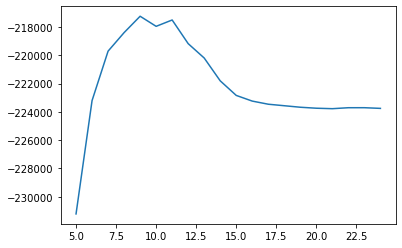

In [54]:
plt.plot(depth,cv_scores1,);

In [55]:
max(cv_scores1)

-217242.56469316865

In [56]:
max(cv_scores2)

0.6609322215190184

In [57]:
min(cv_scores3)

-124017.23636269185

## Conclusion : Hence we were able to train Decision Tree regressor on the given dataset with different attributes to find accuracy and error of the different models.

## Experiment 3 : An experiment to do Feature Engineering for simplifying and speeding up data transformations while also enhancing model accuracy

## Feature selection 

 perviously we have selected the attributes manually on the bases on correlation with target column for model fitting.
 Now, lets use function for selecting the best attribute for model fitting

Feature selection by ExtraTreesRegressor(model based). ExtraTreesRegressor helps us find the features which are most important.

In [58]:
from sklearn.ensemble import ExtraTreesRegressor

In [59]:
X_train, X_val, y_train, y_val = train_test_split(
    data.iloc[:,3:],
    data.iloc[:,2],
    test_size=0.3,
    random_state=0)

In [60]:
reg= ExtraTreesRegressor()

In [61]:
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [62]:
reg.feature_importances_

array([0.00937674, 0.03280263, 0.24521422, 0.01860709, 0.00891378,
       0.05311476, 0.05522341, 0.0137688 , 0.20347239, 0.10340194,
       0.01598377, 0.03469427, 0.00820974, 0.02149471, 0.1305907 ,
       0.04513104])

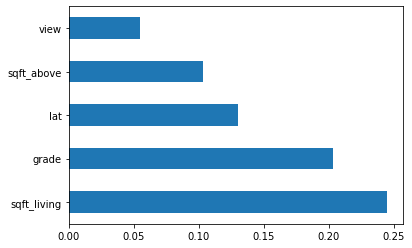

In [63]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Feature  creation

 Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.

For example: we can create a new attribute 'house_age' by substraction current year with yr_built

In [64]:
data['house_age']=2022 -data['yr_built'] 

In [65]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,house_age
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,57
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,21
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,80
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,95
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,8
9757,3448900210,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,8
9758,7936000429,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,13
9759,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,13


# Feature engineering on Model 2

Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.

In [118]:
F=data[['sqft_living','lat','bedrooms','bathrooms','waterfront','view','grade','zipcode']]
C=data.price

In [119]:
#taking log function for continuous variables for our predictor set
# and exponential function for discrete variables.
F['grade'] = np.exp(F['grade'])
F['bedrooms'] = np.exp(F['bedrooms'])
F['waterfront'] = np.exp(F['waterfront'])
F['sqft_living']=np.log(F['sqft_living'])

In [120]:
X_train,X_val,y_train,y_val=train_test_split(F,C,test_size=0.2,random_state=0)

In [121]:
reg_tree = DecisionTreeRegressor(max_depth=11, min_samples_leaf=8)  # fitting decision tree regressor model
reg_tree.fit(X_train, y_train)                                       # max_depth and min_samples_leaf from hyperparameter tuning

DecisionTreeRegressor(max_depth=11, min_samples_leaf=8)

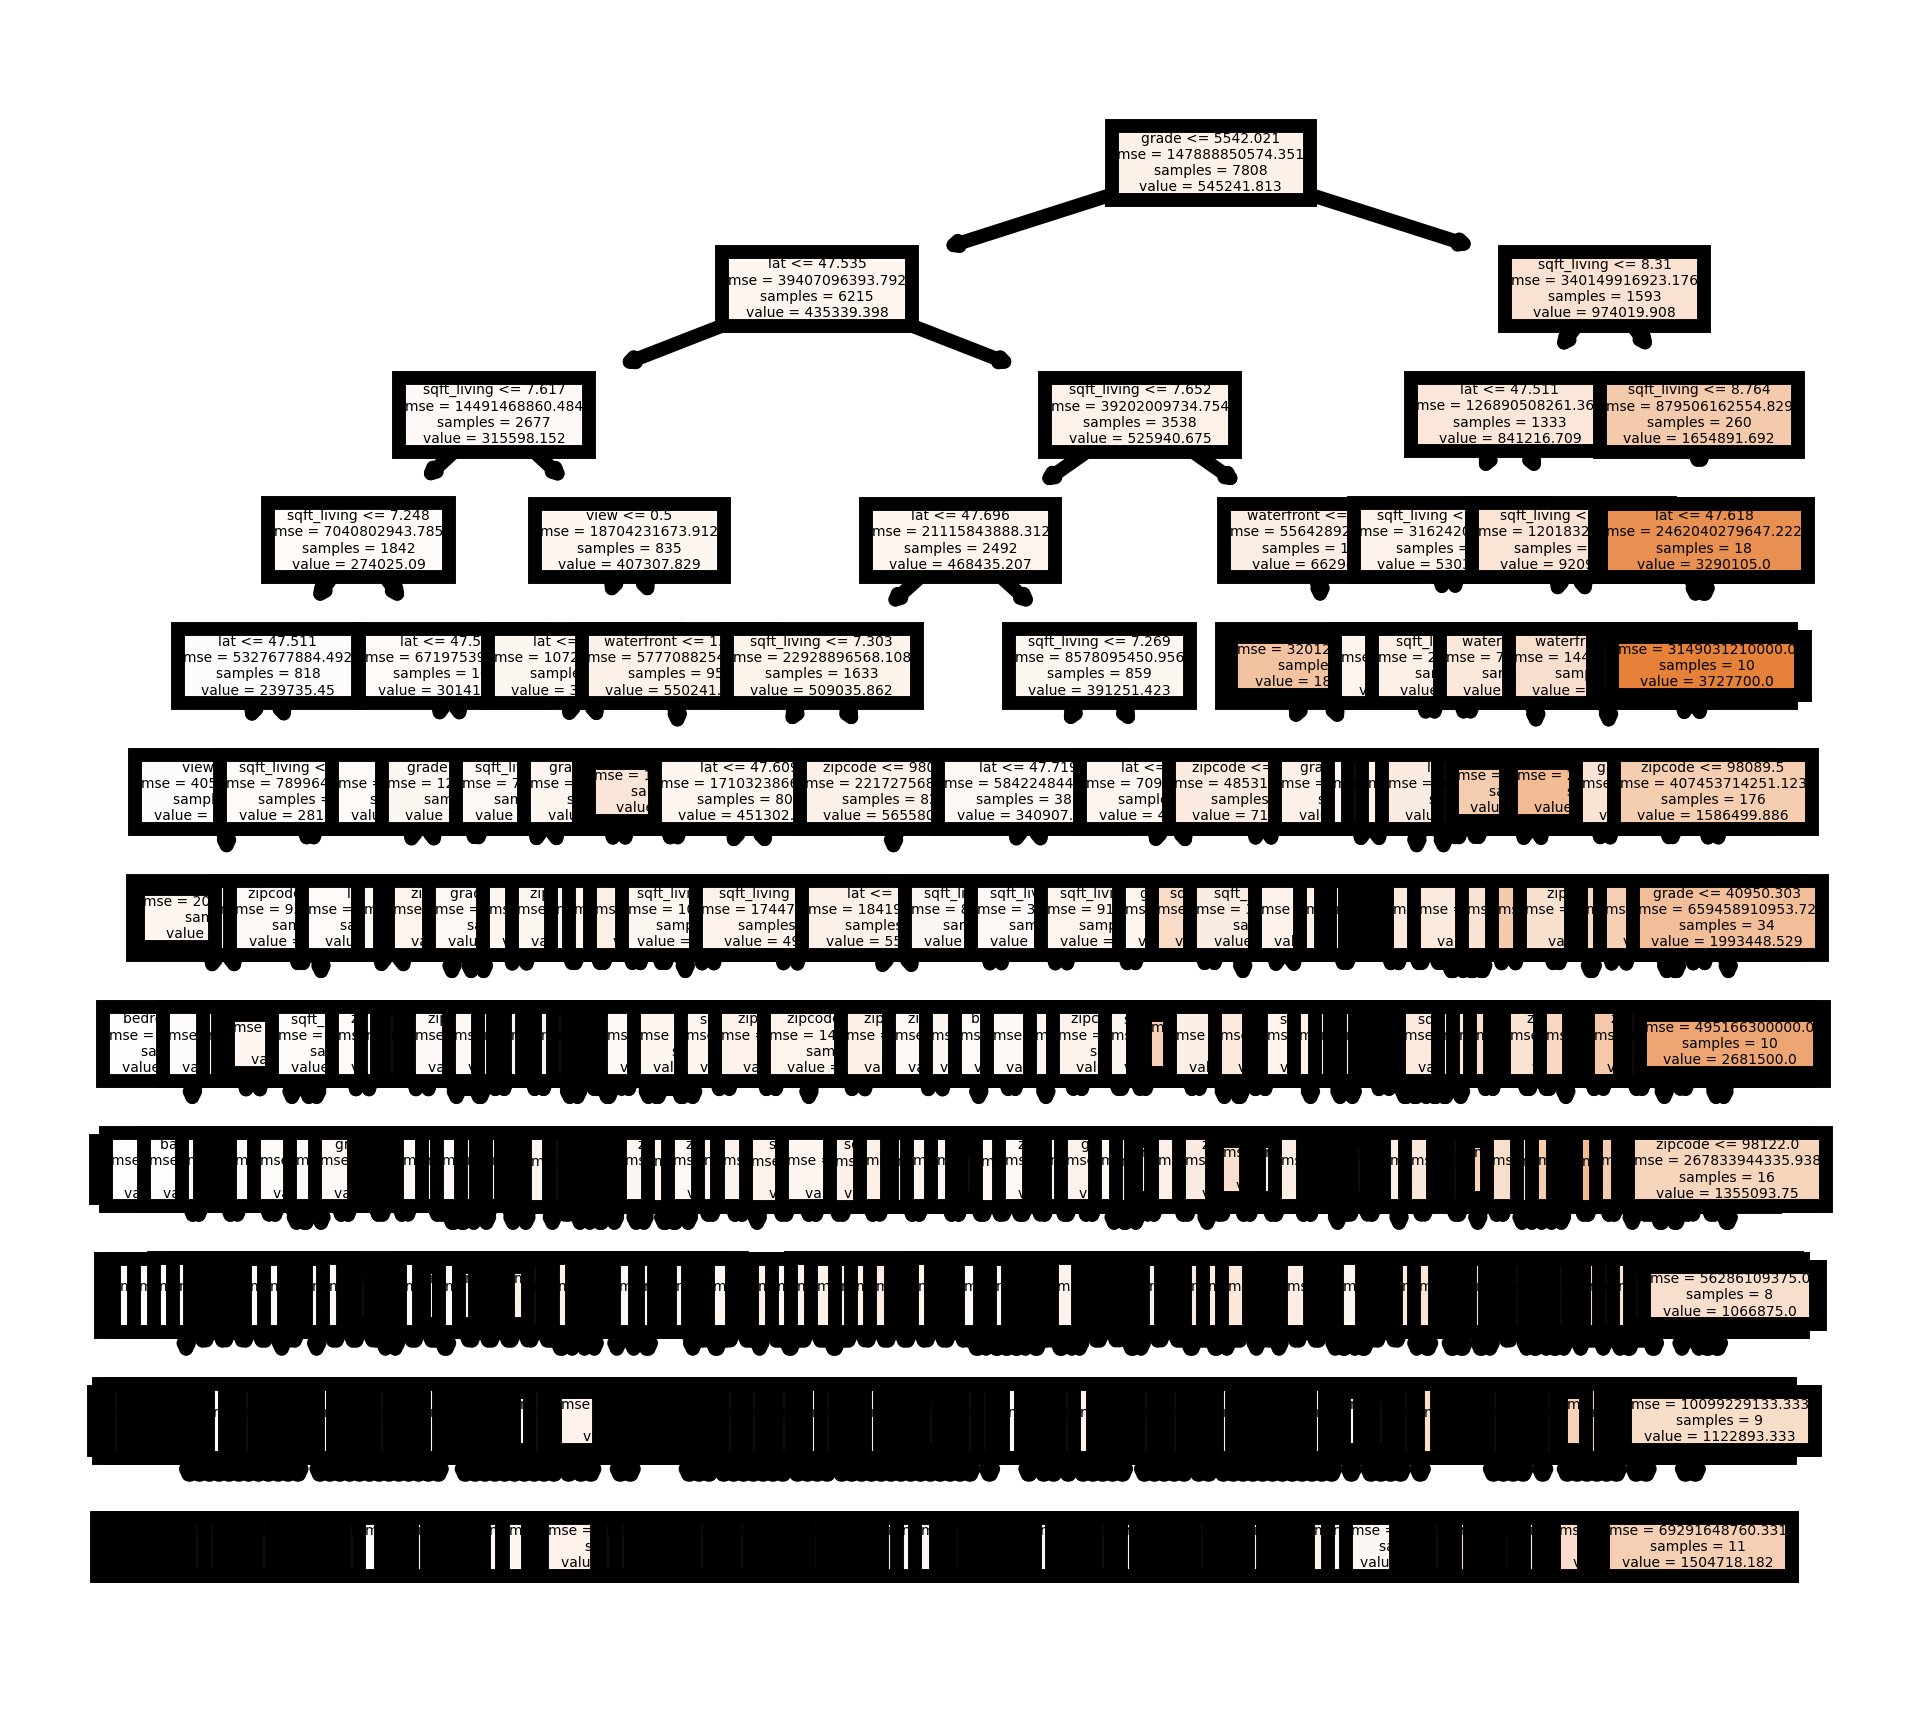

In [109]:
fig,axes=plt.subplots(figsize=(2,2),dpi=1000)                           # plotting decision tree 
tree.plot_tree(reg_tree,feature_names=list(F),filled=True,impurity=True)
plt.show()

In [127]:
y_pred=reg_tree.predict(X_val)

In [128]:
#MAPE(Mean Absolute Percentage Error)
np.mean(np.abs((np.array(y_val) - y_pred)/(np.array(y_val))*100))

17.36574508072652

In [129]:
#RMSE value                         # calculate RMSE 
np.sqrt(np.mean((y_val-y_pred)**2))

164655.2805798955

In [130]:
#MSE value
np.mean(np.abs(y_val-y_pred))

92269.49059901667

## Conclusion : Hence we were able to perform feature engineering of some variables to improve speed and increase accuracy of the model.

## Experiment 4 : An experiment to do Hyperparameter Tuning to find the best parameters for training the model so as to find the least error while predicting the data.

# Hyperparameter tunning for model 2 after feature transformation

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"max_depth" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

**All parameters of Descision Tree Regressor**


    criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
    max_depth: It tells how deep the decision tree can be.The maximum depth of the tree.Deeper the tree more split it has and it captures mopre info from data.In general a DT overfits for large depth value.The tree perfectly fits the training data and fails to generalize on testing data.
    min_samples_split: The minimum number of samples required to split an internal node.Ideal range is 1 to 40.
    min_samples_leaf: The minimum number of samples required to be at a leaf node.Similarr to min sample split ,this describes the minimum number of samples at the leaf,the base of tree.Ideal range is 1 to 20.

In [84]:
from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(reg_tree,param_grid=parameters,scoring='neg_mean_absolute_percentage_error',cv=3,verbose=3)

In [85]:
tuning_model.fit(F,C)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END ................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END ................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END ................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END ................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END ................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END ................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END ................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END ................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END ................max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END ................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END ................max_depth=1, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END ................max_depth=1, min_

[CV 1/3] END ................max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END ................max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END ................max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END ................max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END ................max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END ................max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END ................max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END ................max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END ................max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END ................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV 2/3] END ................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV 3/3] END ................max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV 1/3] END ...............

[CV 2/3] END ................max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END ................max_depth=8, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END ................max_depth=8, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END ................max_depth=8, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END ................max_depth=8, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END ................max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END ................max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END ................max_depth=8, min_samples_leaf=3; total time=   0.0s
[CV 1/3] END ................max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV 2/3] END ................max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END ................max_depth=8, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END ................max_depth=8, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END ...............

[CV 2/3] END ...............max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END ...............max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END ...............max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END ...............max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END ...............max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END ...............max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END ...............max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END ...............max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END ...............max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END ...............max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV 3/3] END ...............max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV 1/3] END ...............max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV 2/3] END ...............

[CV 3/3] END ...............max_depth=14, min_samples_leaf=9; total time=   0.0s
[CV 1/3] END ..............max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV 2/3] END ..............max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV 3/3] END ..............max_depth=14, min_samples_leaf=10; total time=   0.0s
[CV 1/3] END ...............max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV 2/3] END ...............max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV 3/3] END ...............max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV 1/3] END ...............max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV 2/3] END ...............max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV 3/3] END ...............max_depth=15, min_samples_leaf=2; total time=   0.0s
[CV 1/3] END ...............max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV 2/3] END ...............max_depth=15, min_samples_leaf=3; total time=   0.0s
[CV 3/3] END ...............

[CV 2/3] END ...............max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV 3/3] END ...............max_depth=18, min_samples_leaf=4; total time=   0.0s
[CV 1/3] END ...............max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV 2/3] END ...............max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV 3/3] END ...............max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV 1/3] END ...............max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV 2/3] END ...............max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV 3/3] END ...............max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV 1/3] END ...............max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV 2/3] END ...............max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV 3/3] END ...............max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV 1/3] END ...............max_depth=18, min_samples_leaf=8; total time=   0.0s
[CV 2/3] END ...............

GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=12, min_samples_leaf=8),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_absolute_percentage_error', verbose=3)

In [86]:
tuning_model.best_params_

{'max_depth': 11, 'min_samples_leaf': 8}

In [87]:
tuning_model.best_score_

-0.17793952244218125

# Importing test data

In [131]:
test=pd.read_csv(r"C:\Users\Lenovo\Downloads\kc_house_test_data.csv")

In [132]:
X=test[['sqft_living','lat','bedrooms','bathrooms','waterfront','view','grade','zipcode']]
y=test.price

In [133]:
X['grade'] = np.exp(X['grade'])
X['bedrooms'] = np.exp(X['bedrooms'])
X['waterfront'] = np.exp(X['waterfront'])
X['sqft_living']=np.log(X['sqft_living'])

In [134]:
y_pred=reg_tree.predict(X) # running test data on trained model

In [135]:
#MAPE(Mean Absolute Percentage Error)
np.mean(np.abs((np.array(y) - y_pred)/(np.array(y))*100))

17.435600844847706

## Conclusion : Hence we were able to check the accuracy and error of different trained models by predicting target variable on same features as of trained model of the test dataset.